### 线性回归（Linear Regression）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.matlib

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Pop','Profit'])
# 特征缩放
MMS = data.iloc[:,0:2]
data.iloc[:,0:2] = (MMS-MMS.min())/(MMS.max()-MMS.min())
data.head(10)

,Pop,Profit
0,0.063064,0.755663
1,0.029157,0.440250
2,0.203288,0.609173
3,0.115061,0.541780
4,0.048492,0.354261
5,0.195388,0.542972
6,0.142611,0.262005
7,0.206752,0.547222
8,0.084961,0.345889
9,0.001613,0.242186


In [3]:
data.describe()

,Pop,Profit
count,97.000000,97.000000
mean,0.182399,0.317576
std,0.225306,0.205395
min,0.000000,0.000000
25%,0.039636,0.173984
50%,0.090969,0.269982
75%,0.206752,0.362588
max,1.000000,1.000000


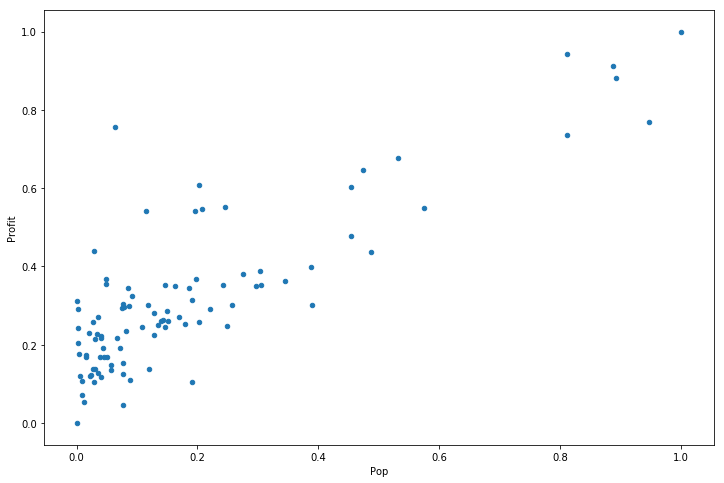

In [4]:
data.plot(kind='scatter',x='Pop',y='Profit',figsize=(12,8))
plt.show()

#### Cost Function 代价函数

In [5]:
def costFunction(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [6]:
data.insert(0,'Ones',1)

In [7]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [8]:
X = np.matrix(X.values) #转化成矩阵
y = np.matrix(y.values) #转化为矩阵
theta = np.matrix([[0,0]]) # 获得一个0矩阵

#### 计算代价函数

In [9]:
costFunction(X,y,theta)

0.07130326820628229

### Batch gradient decent(批量梯度下降)

In [10]:
def gradientDecent(X,y,theta,alpha,iters):
    temp =  np.matrix(np.zeros(theta.shape)) #初始化一个（1,2）的矩阵
    parameters = int(theta.ravel().shape[1]) #参数theta的数量，即矩阵元素的数目
    cost = np.zeros(iters) #创建iters大小的数组，数组元素以 0 来填充
    
    for i in range(iters):
        error = (X*theta.T)-y #X*theta.T是多维特征函数
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j]) #两个数组相乘之后赋值给term
            temp[0,j] = theta[0,j] - ((alpha /len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = costFunction(X,y,theta) #第i个代价函数 
        
    return theta ,cost
            

#### 初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [53]:
alpha = 0.01
iters = 1000

##### 现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [12]:
g,cost = gradientDecent(X,y,theta,alpha,iters)
g # 得出现在的theta值

matrix([[0.26127041, 0.33073688]])

##### 之后我们将刚刚得到的theta带入到代价函数

In [14]:
costFunction(X,y,g)

0.010940070088477633

#####  现在绘制线性模型以及数据，直观地看出它的拟合

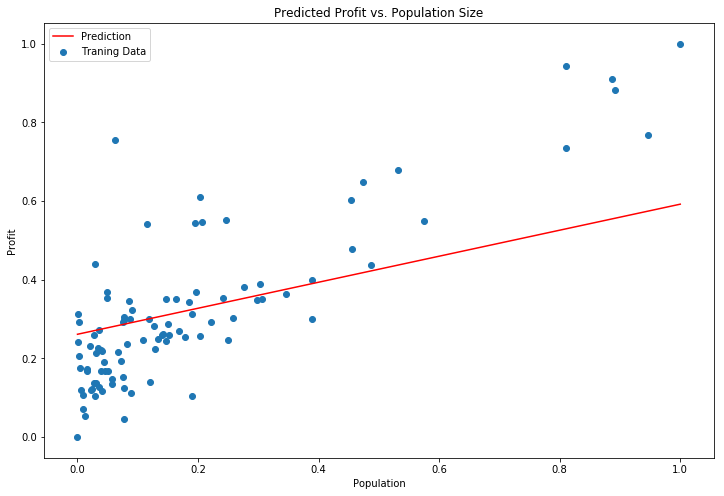

In [15]:
x = np.linspace(data.Pop.min(),data.Pop.max(),100) #numpy.linspace 函数用于创建一个一维数组，数组是一个等差数列构成的
# 三个参数分别是序列起始、终止、步长

f = g[0,0]+(g[0,1]*x) #此时我们可以得出x和theta的值，求出线性函数h的值得集合，即矩阵
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction') # x是未知数，f是我们求出线性函数,'r'指的是红色
ax.scatter(data.Pop,data.Profit,label='Traning Data')
ax.legend(loc=2) #设置图例位置
#        ===============   =============
#         Location String   Location Code
#        ===============   =============
#        'best'             0
#        'upper right'      1
#        'upper left'       2
#         'lower left'      3
#         'lower right'     4
#         'right'           5
#         'center left'     6
#         'center right'    7
#         'lower center'    8
#         'upper center'    9
#         'center'          10
#         ===============   ============= 
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

#####  凸优化-代价降低 ,从图中就可以看出代价函数的值不断降低，逐渐靠近0

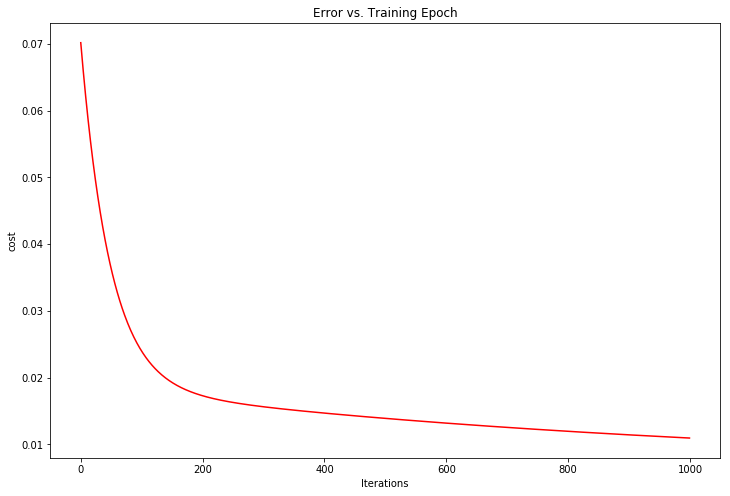

In [16]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r') #np.arange(iters)指的是0-999的一维数组,cost是我们上面求出的代价函数的结果集
ax.set_xlabel('Iterations')
ax.set_ylabel('cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### 多变量线性回归

> ex1data2.txt包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [46]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['Size','BedroomNum','Price'])

##### 特征归一化

In [47]:
#data2.mean() 均值，不包含缺失值
#data2.std() 标准差，不包含缺失值

data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,BedroomNum,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#####  预处理获取的data2,并对新的数据集运行线性回归程序

In [48]:
data2.insert(0,'Ones',1);

#初始化cols(列数目)，X2,Y2
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
Y2 = data2.iloc[:,cols-1:cols]


In [49]:
#将X2,Y2转化为矩阵,并且定义一个矩阵theta
X2 = np.matrix(X2.values)
Y2 = np.matrix(Y2.values)
theta2 = np.matrix(np.array([0,0,0]))

#####  批量梯度下降

In [55]:
alpha2 = 0.01
iters2 = 10000
g2,cost2 = gradientDecent(X2,Y2,theta2,alpha2,iters2)

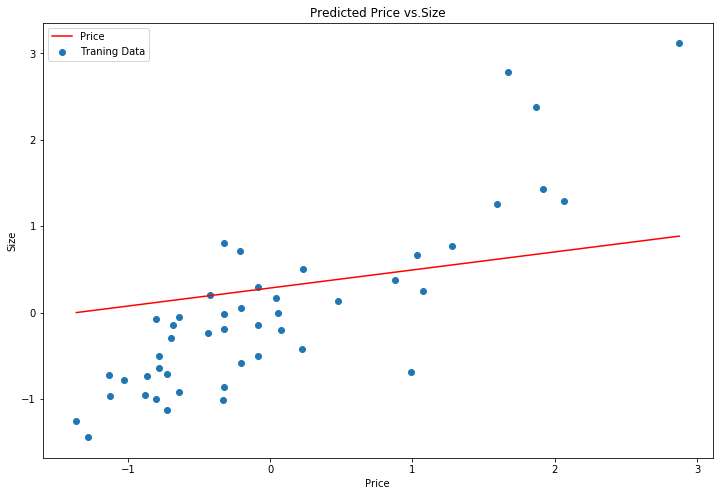

In [71]:
x2 = np.linspace(data2.Price.min(),data2.Price.max(),100) #numpy.linspace 函数用于创建一个一维数组，数组是一个等差数列构成的
# 三个参数分别是序列起始、终止、步长

f2 = g2[0,0]+(g2[0,1]*x) #此时我们可以得出x和theta的值，求出线性函数h的值得集合，即矩阵
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x2, f2, 'r', label='Price') # x是未知数，f是我们求出线性函数,'r'指的是红色
ax.scatter(data2.Price,data2.Size,label='Traning Data')
ax.legend(loc=2) #设置图例位置
ax.set_xlabel('Price')
ax.set_ylabel('Size')
ax.set_title('Predicted Price vs.Size')
plt.show()

#####  可视化批量梯度下降过程

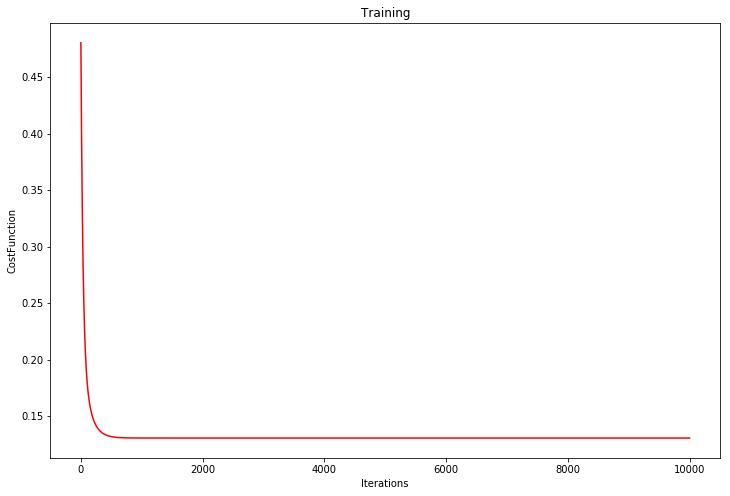

In [59]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters2),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('CostFunction')
ax.set_title('Training')
plt.show()

### Normal Equation 正规方程
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [60]:
#正规方程
def normalEqn(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [66]:
normalEqn(X2,Y2)

matrix([[-1.04083409e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])